# Codes for Markowitz model

### Name : Altaf Ahmad
### Roll no: 18MA20005

**Q1**. Suppose you want to invest Rs 100000.00 in the assets of your data set. Prepare an optimal portfolio of the assets corresponding to each of the following Markowitz, models. Find :
(a) Optimal portfolio

(b)investment strategy(How much to invest in which asset to get minimum risk)

(c) Total return and variance risk at the optimal point

**A.  Markowitz Model I: minimize $w^T \Omega \; w $   subject to  $e^Tw=1$, short selling is allowed.**

First we have to get the Rate of Return of the assets, Covariance matrix and expected return vector (m).
Here, 
$$
w = col(w_1, w_2, ... , w_n) \\
e^T = (1,1,...,1) \in \mathbf{R}^n \\
\text{Then, } w_1 + w_2 + w_3 + ... + w_n = 1 \text{ can be expressed as } e^T w = 1 \\
\text{Expected Return vector : } m^T = (\mu_1, \mu_2, ... ,\mu_n) \text{, where } \mu_i = E(r_i) \\
\text{Covariance Matrix : } C = [c_{ij}] \;\; c_{ij} = cov(r_i, r_j) , (i,j = 1,2,...,n)\; \; , c_{ii} = \sigma_i^2 , (i=1,2,...,n)
$$

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import quadprog
import matplotlib.pyplot as plt

In [2]:
# we extract all the Open Price from the dataset 
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
retu = np.array([[]]) 
# loop over the list of csv files
for f in csv_files:
    # read the csv file
    df = pd.read_csv(f)
    print(f)
    print('Code of the Asset:', f[58:])
    retEach = np.array([])
    df = df[['Date','Open Price']][:101]
    for i in range(1,101) :
        val = (df['Open Price'][i] - df['Open Price'][i-1])/ df['Open Price'][i-1]
        retEach = np.append(retEach, val)
    retu = np.append(retu, retEach)

/home/altaf/10th Sem/mtp -2/Codes/526721.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/541729.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/524667.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/513430.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/500285.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/500112.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/519156.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/523618.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/532725.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/543280.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/507685.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/532475.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/540750.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/533278.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp -2/Codes/531508.csv
Code of the Asset: 
/home/altaf/10th Sem/mtp 

In [3]:
ret1 = retu.reshape(30,100)
covarianceMatrix = np.cov(ret1)
m = np.array([])
for i in range(30):
    m = np.append(m, np.mean(ret1[i]))
m = m.reshape(30,1) # Expected Return Vector    
covInverse = np.linalg.pinv(covarianceMatrix)
e = np.ones(30).reshape(30,1)

In [4]:
ret1

array([[ 0.03488372, -0.00561798, -0.08022599, ...,  0.        ,
         0.04179104, -0.08452722],
       [ 0.00078134,  0.01258635, -0.01787383, ...,  0.01888412,
        -0.03399326, -0.05023329],
       [ 0.02944876, -0.02637147, -0.06473037, ..., -0.00603418,
        -0.01590818, -0.04430836],
       ...,
       [ 0.12280702, -0.0703125 ,  0.1092437 , ..., -0.07407407,
         0.024     ,  0.0546875 ],
       [-0.00101626, -0.00712106, -0.01639344, ..., -0.02715232,
        -0.01633764, -0.01557093],
       [-0.00817641, -0.01274044, -0.01315789, ..., -0.01963746,
        -0.02773498, -0.0118859 ]])

We know that a portfolio with minimum risk has weights given by : 
$$
w = \frac{C^{-1}e}{e^TC^{-1}e}
$$

In [5]:
w1 = np.matmul(covInverse, e)/np.matmul(np.matmul(e.T, covInverse),e)[0][0]

In [6]:
w1 = np.matmul(covInverse, e)/np.matmul(np.matmul(e.T, covInverse),e)[0][0]
print("Optimal portfolio : ")
print(w1)
mu1 = np.matmul(m.T,w1)[0][0]
print("Investment Strategy : ", 100000*w1)
print("Expected Return : ", mu1)
risk1 = np.matmul((np.matmul(w1.T,covarianceMatrix)),w1)[0][0]
print("Expected Risk : ", risk1)

Optimal portfolio : 
[[ 0.02500582]
 [ 0.00915283]
 [-0.01831587]
 [ 0.02109533]
 [-0.04228298]
 [ 0.10855476]
 [-0.00063754]
 [ 0.07376112]
 [ 0.08724174]
 [ 0.00566116]
 [ 0.1366442 ]
 [-0.03282101]
 [-0.02861861]
 [-0.03075123]
 [ 0.03287929]
 [ 0.00048031]
 [ 0.08934613]
 [ 0.03307092]
 [-0.13800597]
 [-0.04518024]
 [-0.03046644]
 [ 0.11822033]
 [ 0.26606891]
 [ 0.24781095]
 [ 0.02324435]
 [ 0.01374473]
 [-0.0046624 ]
 [ 0.01456032]
 [ 0.06813642]
 [-0.00293733]]
Investment Strategy :  [[  2500.58169139]
 [   915.28336379]
 [ -1831.58744691]
 [  2109.53301777]
 [ -4228.29755919]
 [ 10855.47636143]
 [   -63.75412547]
 [  7376.11173622]
 [  8724.1744502 ]
 [   566.11627783]
 [ 13664.42048773]
 [ -3282.10131019]
 [ -2861.86073148]
 [ -3075.12271422]
 [  3287.92889166]
 [    48.03083868]
 [  8934.61271143]
 [  3307.09159613]
 [-13800.59723172]
 [ -4518.02358987]
 [ -3046.64398254]
 [ 11822.03336833]
 [ 26606.8910105 ]
 [ 24781.09453239]
 [  2324.43466867]
 [  1374.47268335]
 [  -466.24

In [7]:
w1

array([[ 0.02500582],
       [ 0.00915283],
       [-0.01831587],
       [ 0.02109533],
       [-0.04228298],
       [ 0.10855476],
       [-0.00063754],
       [ 0.07376112],
       [ 0.08724174],
       [ 0.00566116],
       [ 0.1366442 ],
       [-0.03282101],
       [-0.02861861],
       [-0.03075123],
       [ 0.03287929],
       [ 0.00048031],
       [ 0.08934613],
       [ 0.03307092],
       [-0.13800597],
       [-0.04518024],
       [-0.03046644],
       [ 0.11822033],
       [ 0.26606891],
       [ 0.24781095],
       [ 0.02324435],
       [ 0.01374473],
       [-0.0046624 ],
       [ 0.01456032],
       [ 0.06813642],
       [-0.00293733]])

**B. Markowitz Model II: minimize wTΩ w   subject to  eTw=1, short selling is not allowed.** 

Here, we will use quadprog library of python to solve the quadratic programming problem

In [8]:
def quadprog_solve_qp(P, q, G , h, A=None, b=None):
    qp_G = .5 * (P + P.T)
    qp_a = -q
    if A is not None and G is not None:
        qp_C = -np.vstack([A, G]).T
        qp_b = -np.hstack([b, h])
        meq = A.shape[0]
    else:  
        qp_C = -A.T
        qp_b = -b
        meq = A.shape[0]
    return quadprog.solve_qp(qp_G, qp_a, qp_C, qp_b, meq)[0]

def markovitz_method(covarianceMat, m, mu = None, short_allowed = True,  return_exact = False) : 
    A = np.ones(30).reshape(1,30)
    b = np.ones((1))
    q = np.zeros(30).reshape(30,)
    P = covarianceMat
    G = None
    h = None
    if not short_allowed:
        G = -np.eye(30)
        h = np.zeros(30).reshape(30,)
    if mu :
        if return_exact :
            A = np.vstack([A, m.T])
            b = np.hstack([b, mu])
        else :
            if G is not None :
                G = np.vstack([G, -m.T])
                h = -mu
            else:
                G = -m.T
                h = -mu
    return quadprog_solve_qp(P,q,G,h,A,b)

In [9]:
w2 = markovitz_method(covarianceMatrix, m,  short_allowed=False)

In [26]:
print("Optimal portfolio : ")
print(w2)
mu2 = np.matmul(m.T,w2)
print("Investment Strategy : ", np.around(100000*w2,4))
print("Expected Return : ", mu2)
risk2 = np.matmul((np.matmul(w2.T,covarianceMatrix)),w2)
print("Expected Risk : ", risk2)

Optimal portfolio : 
[ 8.97168036e-19 -1.88179540e-17  2.48555748e-02 -2.83850022e-18
  2.10410933e-02  0.00000000e+00 -9.93044117e-18  2.62666585e-01
  1.80012395e-02  3.58232877e-02  4.91017473e-02  1.76373423e-17
  2.07024480e-02  2.97588092e-02  6.81060676e-19  8.62438227e-19
  3.25577498e-21 -1.47660920e-17  1.68096992e-18  2.18095469e-17
  1.43655300e-02  1.60224413e-01  9.25820468e-02 -2.24067877e-17
  1.14954280e-17  3.36218247e-03 -2.04349365e-18  1.01980892e-01
  1.99560461e-17  1.65534151e-01]
Investment Strategy :  [    0.        -0.      2485.5575    -0.      2104.1093     0.
    -0.     26266.6585  1800.1239  3582.3288  4910.1747     0.
  2070.2448  2975.8809     0.         0.         0.        -0.
     0.         0.      1436.553  16022.4413  9258.2047    -0.
     0.       336.2182    -0.     10198.0892     0.     16553.4151]
Expected Return :  [0.00012302]
Expected Risk :  6.158644944516882e-05


**C : Markowitz Model III: minimize $w^T \Omega w$   subject to  $e^T w=1$, and total return is exactly 5%,  short selling is allowed.**

In [15]:
vec1 = np.matmul(covInverse, m)
vec2 = np.matmul(covInverse, e)
mCe = np.matmul(np.matmul(m.T, covInverse),e)[0][0]
mCm = np.matmul(np.matmul(m.T, covInverse),m)[0][0]
eCm = np.matmul(np.matmul(e.T, covInverse),m)[0][0]
eCe = np.matmul(np.matmul(e.T, covInverse),e)[0][0]
mu = 0.05
m1 = np.array([[mu,mCe], [1,eCe]])
m2 = np.array([[mCm,mu], [eCm,1]])
m3 = np.array([[mCm,mCe], [eCm,eCe]])
w3 = (np.linalg.det(m1)*vec1 + np.linalg.det(m2)*vec2)/np.linalg.det(m3) ## C part

In [27]:
print("Optimal portfolio : ")
print(w3)
print("Investment Strategy : ", 100000*w3)
mu3 = np.matmul(m.T,w3)[0][0]
print("Expected Return : ", mu3)
risk3 = np.matmul((np.matmul(w3.T,covarianceMatrix)),w3)[0][0]
print("Expected Risk : ", risk3)

Optimal portfolio : 
[[ 0.04559132]
 [-0.0150951 ]
 [ 0.12211014]
 [ 0.08734582]
 [ 0.72647659]
 [ 0.29614853]
 [ 0.49998656]
 [ 0.94426919]
 [ 0.39615762]
 [ 0.34940615]
 [-0.54516756]
 [ 2.30322724]
 [ 0.10569571]
 [ 1.03372053]
 [-0.59356757]
 [ 0.79380331]
 [ 0.02135442]
 [-0.24118283]
 [-0.6839617 ]
 [-1.08248554]
 [-2.14000911]
 [ 1.48541575]
 [-0.73855218]
 [-1.25210886]
 [ 0.59874002]
 [ 0.05873757]
 [ 0.60080509]
 [ 0.89942029]
 [-1.75426455]
 [-1.32201686]]
Investment Strategy :  [[   4559.13201   ]
 [  -1509.50968275]
 [  12211.0143583 ]
 [   8734.58186691]
 [  72647.65850103]
 [  29614.85330612]
 [  49998.65626516]
 [  94426.91935144]
 [  39615.76174064]
 [  34940.61515216]
 [ -54516.755604  ]
 [ 230322.72415439]
 [  10569.57119987]
 [ 103372.05284121]
 [ -59356.75686734]
 [  79380.3309216 ]
 [   2135.44158345]
 [ -24118.2832766 ]
 [ -68396.17013456]
 [-108248.55391819]
 [-214000.91117947]
 [ 148541.57542424]
 [ -73855.21820828]
 [-125210.88633198]
 [  59874.00160157]
 [   

**D : Markowitz Model IV: minimize $w^T \Omega w$   subject to  $e^T w=1$, and total return is  a minimum of 5%,  short selling is allowed.**

In [17]:
w4 = markovitz_method(covarianceMatrix, m,mu=0.05,  short_allowed=True, return_exact=True)

In [28]:
print("Optimal portfolio : ")
print(w4)
mu4 = np.matmul(m.T,w4)
print("Investment Strategy : ", 100000*w1)
print("Expected Return : ", mu4)
risk4 = np.matmul((np.matmul(w4.T,covarianceMatrix)),w4)
print("Expected Risk : ", risk4)

Optimal portfolio : 
[ 0.04559132 -0.0150951   0.12211014  0.08734582  0.72647659  0.29614853
  0.49998656  0.94426919  0.39615762  0.34940615 -0.54516756  2.30322724
  0.10569571  1.03372053 -0.59356757  0.79380331  0.02135442 -0.24118283
 -0.6839617  -1.08248554 -2.14000911  1.48541575 -0.73855218 -1.25210886
  0.59874002  0.05873757  0.60080509  0.89942029 -1.75426455 -1.32201686]
Investment Strategy :  [[  1374.47268335]
 [  -293.73269354]
 [  1456.03176419]
 [ -4228.29755919]
 [  2109.53301777]
 [   566.11627783]
 [    48.03083868]
 [ 26606.8910105 ]
 [  2324.43466867]
 [  3287.92889166]
 [  8724.1744502 ]
 [-13800.59723172]
 [  3307.09159613]
 [  6813.64237223]
 [   -63.75412547]
 [   915.28336379]
 [  -466.24043877]
 [ -4518.02358987]
 [  7376.11173622]
 [ -1831.58744691]
 [ 10855.47636143]
 [ 13664.42048773]
 [  8934.61271143]
 [ -3075.12271422]
 [ -3282.10131019]
 [  2500.58169139]
 [ -2861.86073148]
 [ 11822.03336833]
 [ -3046.64398254]
 [ 24781.09453239]]
Expected Return :  

**Q2: Draw the Markowitz curve and locate the minimum variance point in the turn.**

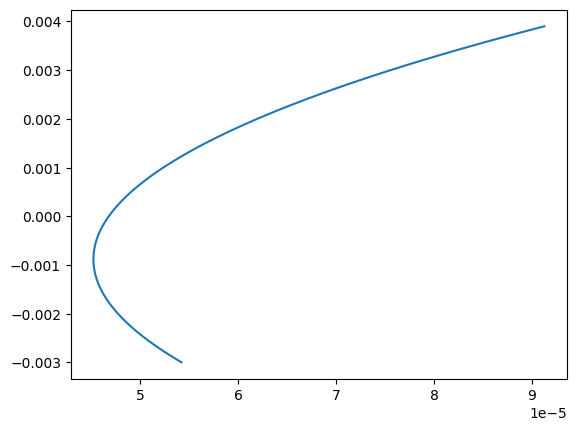

In [20]:
y = np.arange(-0.003, 0.004, 0.0001)
x = np.zeros(y.shape)
for i, mu in enumerate(y):
    wCalc = markovitz_method(covarianceMatrix, m,mu=y[i], return_exact=True)
    x[i] = np.matmul((np.matmul(wCalc.T,covarianceMatrix)),wCalc)
plt.plot(x,y)

As we can see from the figure, the minimum variance point can be taken as :

In [21]:
ind = np.where(x == np.amin(x))

In [23]:
print("Minimum variance is : ", y[ind[0][0]], " and risk is ", x[ind[0][0]])

Minimum variance is :  -0.0009000000000000037  and risk is  4.525155123480506e-05
